In [45]:
import numpy as np
import pandas as pd

### Model definition 

In [286]:
from IPython.display import Image

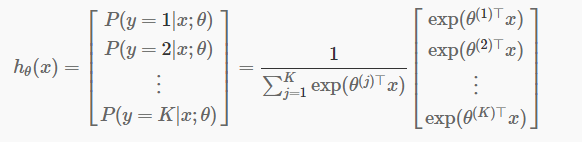

In [287]:
Image("model.PNG")

In [ ]:
def model(x,theta):
    logit = theta.T @ x
    a = np.exp(logit)
    s = np.sum(a, axis=0)
    b = s @ np.ones((theta.shape[1], 1))
    return a / b

### Cost function

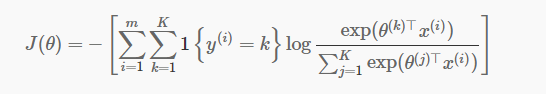

In [288]:
Image("cost.PNG")

In [115]:
def single_cost(xi,yi,theta,c):
    x = xi.reshape(-1,1)
    h = model(x,theta)
    c = c.reshape(-1,1) 
    b = np.round(yi == c).reshape(-1,1)
    return np.sum(b * np.log(h))   
def cost(x,y,theta):
    c = np.unique(y)
    rs = []
    for i in range(x.shape[1]):
        xi = x[:,i]
        yi = y[i]
        sc = single_cost(xi,yi,theta,c)
        rs.append(sc)
    return -1 * np.sum(rs)

 ### Gradient computation

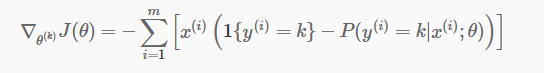

In [289]:
Image("grad.PNG")

In [185]:
def single_grad(xi,yi,theta, c):
    a = np.round(yi==c).reshape(-1,1) 
    x = xi.reshape(-1,1)
    b = model(x,theta)
    d = x @ (a - b).T
    return - d
def grad(x,y,theta):
    rs = []
    c = np.unique(y)
    grad = np.zeros(theta.shape)
    for i in range(x.shape[1]):
        grad = grad + single_grad(x[:,i],y[i],theta,c) 
    return -1 * grad

### Gradient descent

In [198]:
def gradient_descent(x,y,theta,etha=0.001,n_iterations=100):
    costs = []
    for i in range(n_iterations):
        theta = theta + etha * grad(x,y,theta)
        costs.append(cost(x,y,theta))
    return theta,costs    

### Learning process

In [152]:
from sklearn.datasets import load_iris

In [153]:
iris = load_iris()
X = iris['data']
Y = iris['target']

In [154]:
X[:5,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [160]:
np.unique(Y)

array([0, 1, 2])

In [158]:
dataset = np.hstack((X,Y.reshape(-1,1)))
for i in range(20):
    np.random.shuffle(dataset)
dataset[:5,:]

array([[4.6, 3.2, 1.4, 0.2, 0. ],
       [6.1, 3. , 4.6, 1.4, 1. ],
       [5.9, 3. , 4.2, 1.5, 1. ],
       [5.1, 3.4, 1.5, 0.2, 0. ],
       [6.4, 2.8, 5.6, 2.2, 2. ]])

In [196]:
x_train = dataset[20:,:4]
y_train = dataset[20:, 4]

x_test = dataset[:20,:4]
y_test = dataset[:20, 4]

x_train.shape, y_train.shape

((130, 4), (130,))

In [234]:
theta = np.random.randn(4,3)
theta

array([[-0.26218036, -1.56091951,  0.22836793],
       [-0.46537893,  1.00603297,  0.87514598],
       [-0.7341258 , -0.382757  , -1.319983  ],
       [-0.60757903,  0.94569358,  0.16059232]])

In [235]:
x = x_train.T
y = y_train
 
coefs,costs = gradient_descent(x,y,theta,etha=0.001,n_iterations=500)

In [149]:
from matplotlib import pyplot as pp
pp.style.use("ggplot")


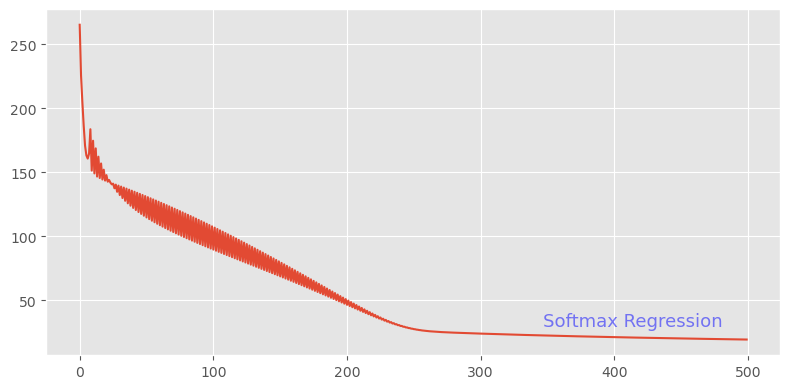

In [237]:
pp.style.use("default")
pp.style.use("ggplot")
fig,ax = pp.subplots(figsize=(8,4))
xc = np.arange(500)
ax.plot(xc,costs)
 
ax.text(0.8, 0.1, 'Softmax Regression', fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='blue', alpha=0.5)
#ax.set_title('$R^2= %.2f$' % r, fontsize=18)
fig.tight_layout()

In [247]:
from sklearn.metrics import confusion_matrix

In [263]:
st = np.hstack((x_test, y_test.reshape(-1, 1)))
st

array([[4.6, 3.2, 1.4, 0.2, 0. ],
       [6.1, 3. , 4.6, 1.4, 1. ],
       [5.9, 3. , 4.2, 1.5, 1. ],
       [5.1, 3.4, 1.5, 0.2, 0. ],
       [6.4, 2.8, 5.6, 2.2, 2. ],
       [5.7, 2.6, 3.5, 1. , 1. ],
       [6.3, 2.5, 5. , 1.9, 2. ],
       [7.7, 2.8, 6.7, 2. , 2. ],
       [6.7, 3.1, 5.6, 2.4, 2. ],
       [7.9, 3.8, 6.4, 2. , 2. ],
       [5.1, 3.7, 1.5, 0.4, 0. ],
       [5.9, 3. , 5.1, 1.8, 2. ],
       [7.2, 3. , 5.8, 1.6, 2. ],
       [6.1, 2.8, 4. , 1.3, 1. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5.1, 3.8, 1.9, 0.4, 0. ],
       [6.2, 3.4, 5.4, 2.3, 2. ],
       [6.9, 3.2, 5.7, 2.3, 2. ],
       [6.9, 3.1, 5.1, 2.3, 2. ]])

In [279]:
pred = model(x_test.T, coefs)
pc0 = pred[0,:]
pc1 = pred[,1:]
pc2 = pred[2,:]

In [280]:
confusion_matrix(y_test, np.round(pc0))

array([[ 0,  6,  0],
       [ 4,  0,  0],
       [10,  0,  0]], dtype=int64)

In [281]:
confusion_matrix(y_test, np.round(pc2))

array([[6, 0, 0],
       [0, 4, 0],
       [8, 2, 0]], dtype=int64)

In [282]:
confusion_matrix(y_test, np.round(pc2))

array([[6, 0, 0],
       [0, 4, 0],
       [8, 2, 0]], dtype=int64)